# German Web Tracking: Online Browsing Behaviour

**Date:** 25 November 2024

**Link to dataset:** https://zenodo.org/records/4757574

In [1]:
import sys
import os

sys.path.append(os.path.abspath("../../"))

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from cybergpt.datasets.loaders import WebTrackingLoader
from cybergpt.datasets.websites import WebsiteDataset, plot_distributions
from cybergpt.datasets.graphs import GraphDataset
from cybergpt.datasets.sequences import plot_metrics

In [3]:
DATA_CSV = "../../data/web_tracking/web_routineness_release/raw/browsing.csv"

In [4]:
user_data = WebTrackingLoader(DATA_CSV).user_data
dataset = WebsiteDataset(user_data)

Loading and preprocessing user data...


  0%|          | 0/2148 [00:00<?, ?it/s]

/Users/marcos/Documents/projects/bai/cybergpt-datasets/cybergpt/datasets/loaders.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["timestamp"] = pd.to_datetime(df["used_at"])
/Users/marcos/Documents/projects/bai/cybergpt-datasets/cybergpt/datasets/loaders.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["timestamp"] = pd.to_datetime(df["used_at"])


Loaded data for 2148 users


In [5]:
sequence_dataset = dataset.to_sequence_dataset()
graph_dataset = GraphDataset.from_sequence_dataset(sequence_dataset)

Processing user data:   0%|          | 0/2148 [00:00<?, ?it/s]

In [6]:
print(f"Users: {len(user_data)}")
print(f"Sequences (split on date): {len(sequence_dataset.sequences)}")
print(f"Unique (normalised) domains: {sequence_dataset.get_vocab_size()}")

Users: 2148
Sequences (split on date): 38139
Unique (normalised) domains: 49401


## Graph Metrics

In [7]:
graph_metrics = graph_dataset.calculate_metrics()

Calculating graph metrics: 100%|████████| 38139/38139 [00:25<00:00, 1503.43it/s]


In [8]:
graph_dataset.summary_report(graph_metrics)

Graph Dataset Summary Report
------------------------------
Total graphs: 38139

Average graph size: 15.21767744303731
Average graph density: 0.36720954416779744
Average strongly connected components: 1.778474370304905
Average modularity: 0.37006554430918537
Average branching factor: 2.5309153955712436
Average fraction of graphs per edge: 0.0004915026247281694

Ambient size: 49401
Ambient density: 0.00019920878849261932
Ambient avg clustering: 0.5101107951890367
Ambient avg degree: 19.681828303070787
Ambient strongly connected components: 384
Ambient modularity: 0.40429237665479334
Ambient avg branching: 9.856276863190333



## Sequence Metrics

In [9]:
metrics = sequence_dataset.calculate_metrics()

Calculating metrics: 100%|██████████████| 38139/38139 [00:05<00:00, 7233.37it/s]


In [10]:
sequence_dataset.summary_report(metrics)

Sequence Dataset Summary Report
--------------------------------
Total sequences: 38139
Average sequence length: 239.9444925142243
Average unique characters per sequence: 15.22745745824484
Average character coverage: 0.00030824188697080714
Average character repetition rate: 0.8997745158219733
Average transition entropy: 2.243621288094118
Average TF-IDF cosine similarity: 0.15176656578011669
Max similarity: 1.0000000000000002

Unique transitions: 486151
Top 5 starting characters: {'google.de': 4459, 'google.com': 3154, 'facebook.com': 2943, 'youtube.com': 1948, 'web.de': 1749}



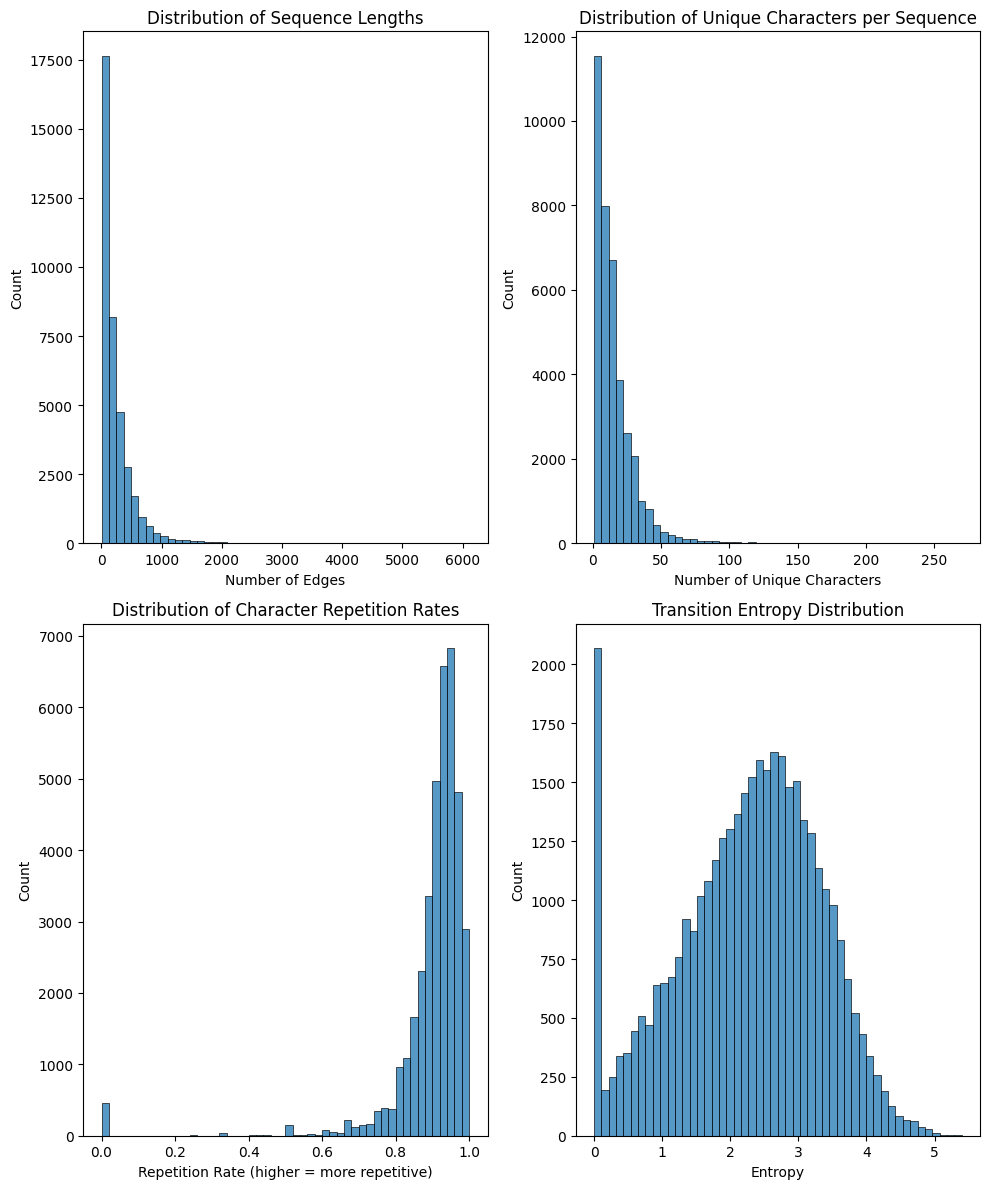

In [11]:
plot_metrics(metrics)
plt.show()

## Browsing Metrics

In [12]:
user_stats, anomalies = dataset.analyse_browsing_patterns_across_users()

User Analysis Summary
-----------------------
total_users: 2148.00
avg_records_per_user: 4260.36
avg_domains_per_user: 105.93
avg_active_days: 17.76
users_with_night_activity: 327.00
users_with_weekend_activity: 643.00
effective_dimension_of_browsing_patterns: 118.79
anomalous_users: 252.00

User Statistics Summary
-----------------------
       total_records  unique_domains  active_days  avg_domains_per_day  \
count    2148.000000     2148.000000  2148.000000          2148.000000   
mean     4260.355214      105.934823    17.755587            12.359935   
std      6587.597053      117.930894    10.296641            10.914630   
min         1.000000        1.000000     1.000000             1.000000   
25%       550.000000       26.000000     8.000000             5.463636   
50%      1937.000000       70.500000    18.000000             9.241667   
75%      5586.250000      146.000000    28.000000            16.225490   
max     85068.000000     1312.000000    31.000000           119.709

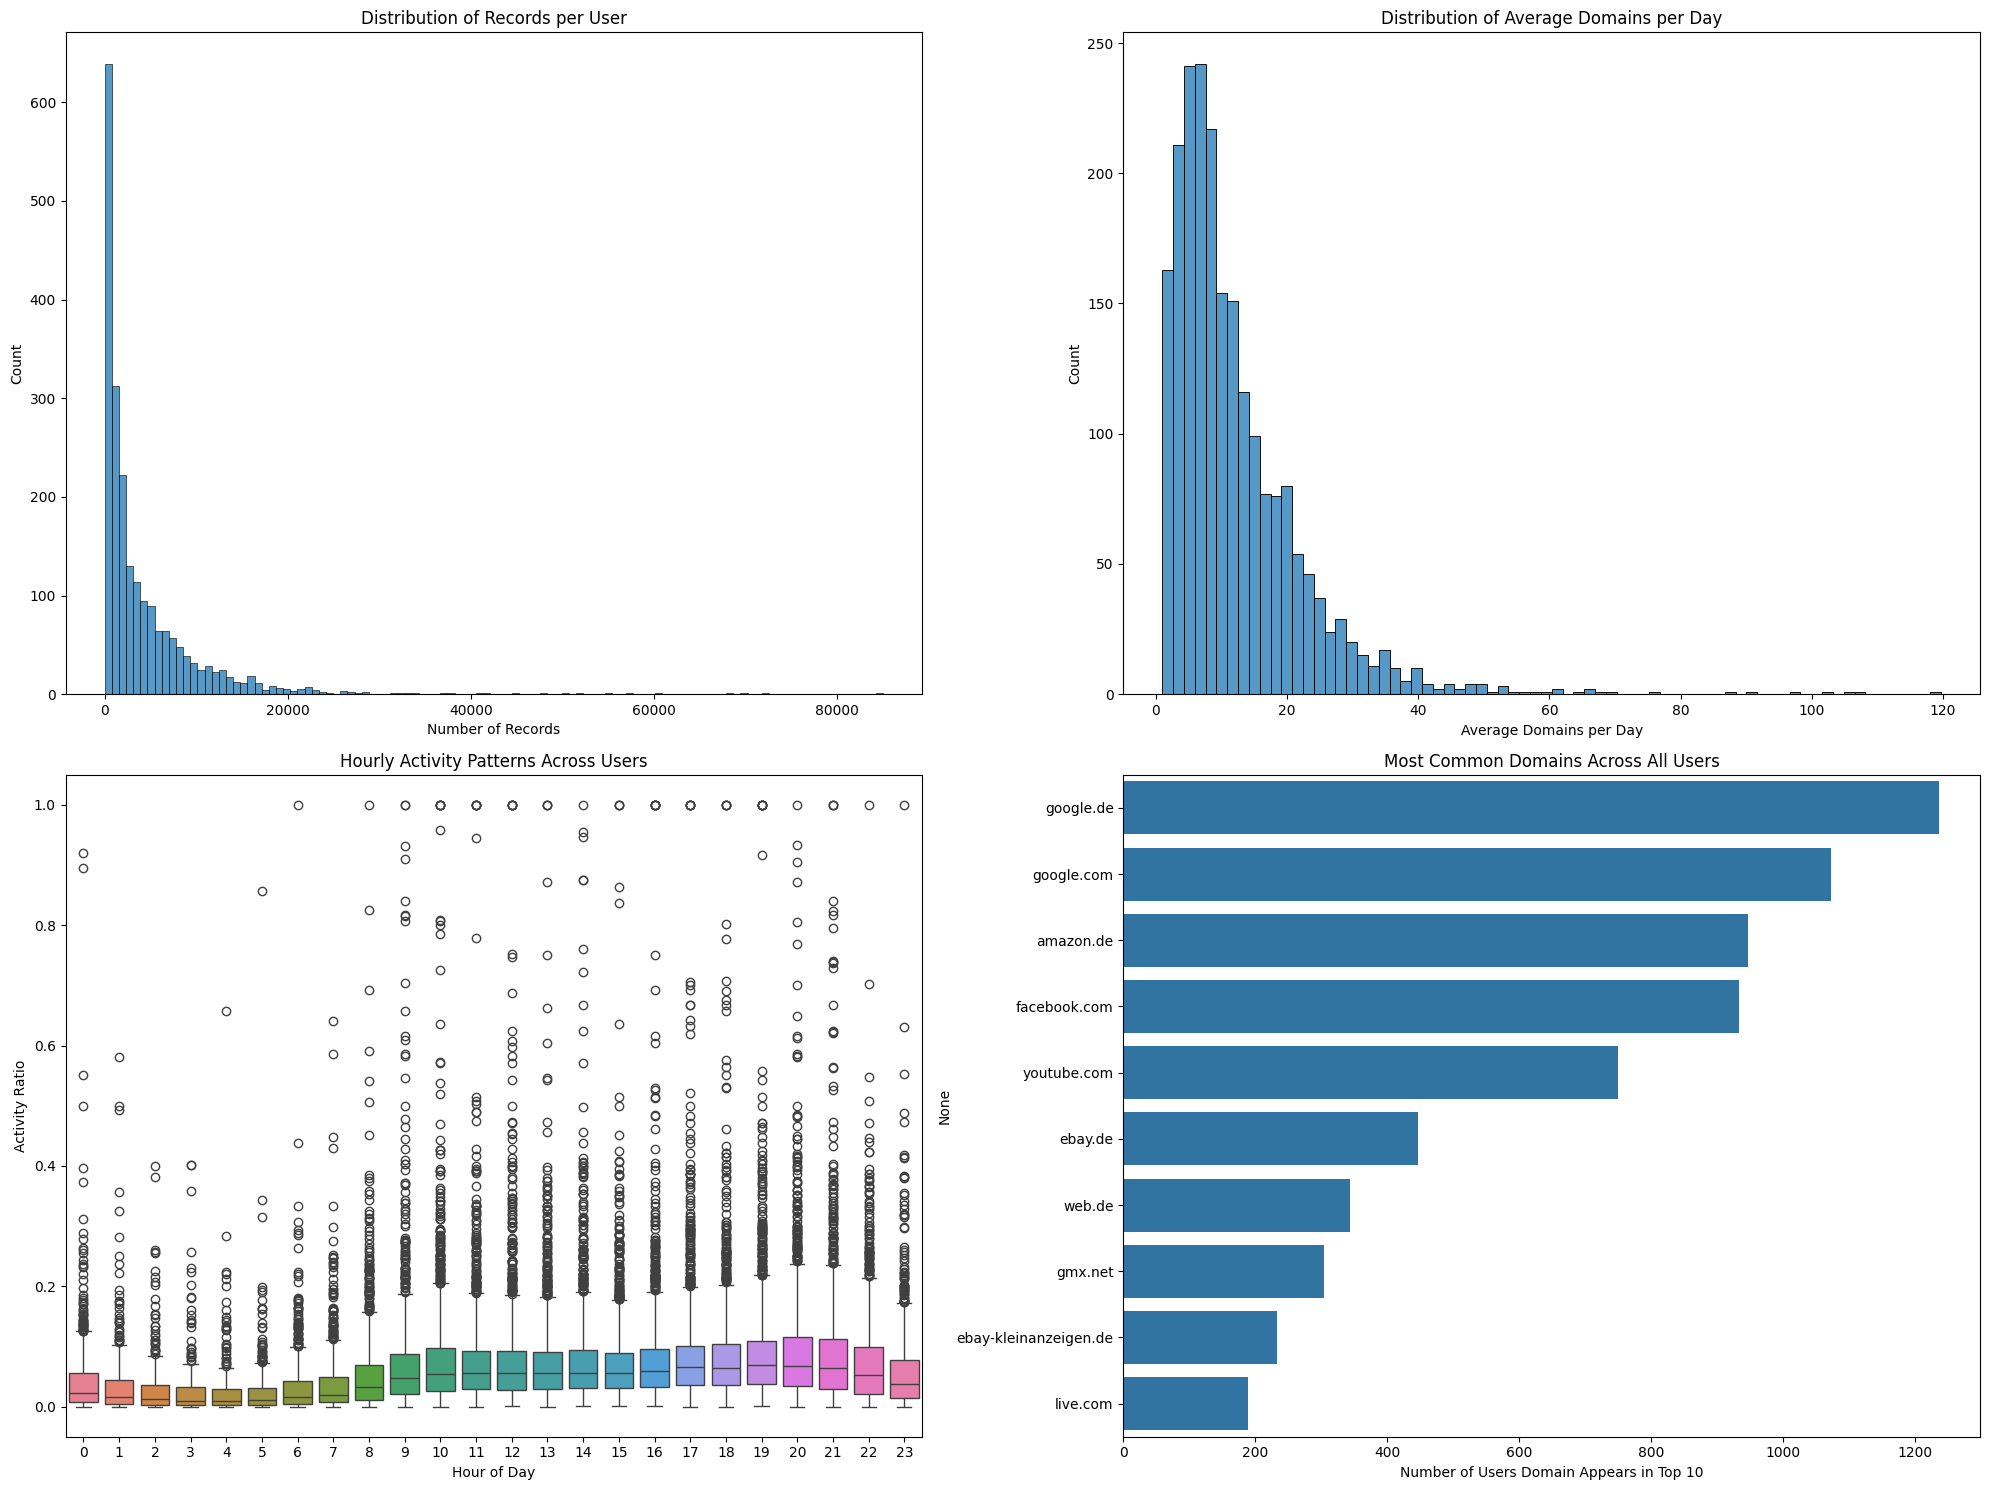

In [13]:
top_domain_stats = dataset.compute_top_domains()
hourly_patterns, _ = dataset.analyse_temporal_patterns_across_users(dataset.user_data)

plot_distributions(user_stats, hourly_patterns, top_domain_stats)
plt.show()